# E-SHOPPING MARKETING ANALYSIS


## 1. LIMPIEZA DE DATOS Y ANÁLISIS EXPLORATORIO

## 1.1. Importamos las librerías y decargamos el dataset

In [243]:
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/Paula Pareja/Instalaciones/Desktop/Posgrado Business Analytics/PROYECTO FINAL/e-shop clothing 2008.csv", sep=';')

In [3]:
df
#Tenemos un dataset de 165474 filas y 14 columnas

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


### Explicación de las variables:
- YEAR: (2008)
- MONTH: from April (4) to August (8)
- DAY: day number of the month
- ORDER: sequence of clicks during one session
- COUNTRY: variable indicating the country of origin of the IP address with the following categories:
    - 1. Australia
    - 2. Austria
    - 3. Belgium
    - 4. British Virgin Islands
    - 5. Cayman Islands
    - 6. Christmas Island
    - 7. Croatia
    - 8. Cyprus
    - 9. Czech Republic
    - 10. Denmark
    - 11. Estonia
    - 12. unidentified
    - 13. Faroe Islands
    - 14. Finland
    - 15. France
    - 16. Germany
    - 17. Greece
    - 18. Hungary
    - 19. Iceland
    - 20. India
    - 21. Ireland
    - 22. Italy
    - 23. Latvia
    - 24. Lithuania
    - 25. Luxembourg
    - 26. Mexico
    - 27. Netherlands
    - 28. Norway
    - 29. Poland
    - 30. Portugal
    - 31. Romania
    - 32. Russia
    - 33. San Marino
    - 34. Slovakia
    - 35. Slovenia
    - 36. Spain
    - 37. Sweden
    - 38. Switzerland
    - 39. Ukraine
    - 40. United Arab Emirates
    - 41. United Kingdom
    - 42. USA
    - 43. biz (*.biz) dominio de Internet genérico (TLD) previsto para ser usado por negocios
    - 44. com (*.com) Internacional
    - 45. int (*.int) int es un dominio de Internet genérico de nivel superior usado en las DNS de Internet. 
             #De acuerdo con la política del IANA, los dominios . int están reservados para organizaciones con tratados internacionales y organizaciones no gubernamentales con el estatus de "observadores" de las Naciones Unidas.
    - 46. net (*.net)
    - 47. org (*.org) #organizaciones
    
- SESSION ID: variable indicating session id (short record)
- PAGE 1 (MAIN CATEGORY): concerns the main product category:
    - 1. trousers
    - 2. skirts
    - 3. blouses
    - 4. sale

- PAGE 2 (CLOTHING MODEL): contains information about the code for each product 
    #217 products
- COLOUR: colour of product
    - 1. beige
    - 2. black
    - 3. blue
    - 4. brown
    - 5. burgundy
    - 6. gray
    - 7. green
    - 8. navy blue
    - 9. of many colors
    - 10. olive
    - 11. pink
    - 12. red
    - 13. violet
    - 14. white

- LOCATION: photo location on the page, the screen has been divided into six parts:
    - 1-top left
    - 2-top in the middle
    - 3-top right
    - 4-bottom left
    - 5-bottom in the middle
    - 6-bottom right

- MODEL PHOTOGRAPHY: variable with two categories: 
    - 1. en face (de frente)
    - 2. profile (de perfil)
    
- PRICE: price in US dollars
- PRICE 2: variable informing whether the price of a particular product is higher than the average price for the entire product category
    - 1. yes
    - 2. no
- PAGE: page number within the e-store website (from 1 to 5)

## 1.2. Limpieza de los datos

In [4]:
df.columns
    #El dataset incluye variables como la fecha en el se realizó la compra (año, mes y día), la orden de compra, el país,
        #el ID de la sesión, la categoría del producto, la modelo, el color
        #la localización, la fotografía, el precio, si el precio está fuera de lo normal, y la página

Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'model photography', 'price', 'price 2', 'page'],
      dtype='object')

In [5]:
#Viendo el nombre de las variables, considero necesario cambiarlo para hacer más sencillo el desarrollo del proyecto
#Primero sustituimos los espacios por "_"
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['year', 'month', 'day', 'order', 'country', 'session_ID',
       'page_1_(main_category)', 'page_2_(clothing_model)', 'colour',
       'location', 'model_photography', 'price', 'price_2', 'page'],
      dtype='object')

In [6]:
#A continuación, simplifico los nombres complejos de columnas y cambio a otros más descriptivos para localizarlas fácilmente
df = df.rename(columns={'order': 'clics', 'page_1_(main_category)': 'category', 'page_2_(clothing_model)': 'clothing_code','price_2': 'overpriced'})
df.columns
        #Index(['year', 'month', 'day', 'clics', 'country', 'session_ID', 'category',
             #  'clothing_code', 'colour', 'location', 'model_photography', 'price',
             #  'overpriced', 'page']

Index(['year', 'month', 'day', 'clics', 'country', 'session_ID', 'category',
       'clothing_code', 'colour', 'location', 'model_photography', 'price',
       'overpriced', 'page'],
      dtype='object')

In [7]:
df.head(5)

,year,month,day,clics,country,session_ID,category,clothing_code,colour,location,model_photography,price,overpriced,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [8]:
df.shape
    #El dataset incluye 165.474 filas y 14 columnas
    #Cada fila corresponde a un producto vendido, por lo que se han vendido 165474 productos
    #Esto quiere decir que la misma persona ha podido comprar varios productos (más de una fila)

(165474, 14)

In [9]:
df.info()
    #Todas las variables son numéricas (tipo int) salvo "clothing code" la cual es tipo texto (object)
    #Dicha variable continee el código correspondiente a cada producto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   year               165474 non-null  int64 
 1   month              165474 non-null  int64 
 2   day                165474 non-null  int64 
 3   clics              165474 non-null  int64 
 4   country            165474 non-null  int64 
 5   session_ID         165474 non-null  int64 
 6   category           165474 non-null  int64 
 7   clothing_code      165474 non-null  object
 8   colour             165474 non-null  int64 
 9   location           165474 non-null  int64 
 10  model_photography  165474 non-null  int64 
 11  price              165474 non-null  int64 
 12  overpriced         165474 non-null  int64 
 13  page               165474 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 17.7+ MB


In [10]:
#Creo que es más interesante combinar las celdas mes día año en una sola columna de fecha
#Aún así dejaré las columnas mes día año para analizarlas al detalle y por si necesito celdas numéricas para el análisis
df['date'] = df['month'] + df['day'] + df['year']
df['date'] = pd.to_datetime(df[['month', 'day', 'year']])

In [11]:
df.columns

Index(['year', 'month', 'day', 'clics', 'country', 'session_ID', 'category',
       'clothing_code', 'colour', 'location', 'model_photography', 'price',
       'overpriced', 'page', 'date'],
      dtype='object')

Por ende, las variables quedarían así:
 - **Year**: año en el que se realizó la compra
 - **Month**: mes en el que se realizó la compra
 - **Day**: día en el que se realizó la compra
 - **Clics**: clics durante una sesión
 - **Country**: país IP
 - **Session ID**: la ID de sesión (que corresponde al ID del cliente)
 - **Category**: categoría del producto (pantalones, faldas, blusas o rebajas)
 - **Clothing_code**: código de cada producto
 - **Colour**: color del producto
 - **Location**: localización dentro de la página (arriba izquierda, medio, y derecho, abajo izquierda, medio o derecha)
 - **Model_photography**: foto de cara o perfil
 - **Price**: precio
 - **Overpriced**: si el precio se encuentra fuera de su precio habitual
 - **Page**: el número de la página dentro de la página web
 - **Date**: fecha en la que se realizó la compra

Haciendo un primer análisis de las variables con las contamos puedo identificar algunos campos de mejora en la recopilación de datos de la empresa. Deben añadirse algunas variables esenciales para mejorar la cultura de datos: 

 - Hora de la compra: una variable esencial para el lanzamiento de campañas de marketing y análisis del comportamiento del cliente.
 - Tiempo del usuario en la web: si bien aparecen los clics durante la sesión (compra de un producto), no podemos saber ni a qué producto se han realizado esos clics, ni contamos con grabaciones de pantalla para valorar la experiencia de usuario. 
     - Si tuviéramos clics por producto podríamos saber el nivel de interés en el producto y si vende en proporciónEdadd  al interés (si el interés es alto y las ventas son pocas es que existe un problema con el producto en concreto aunque haya demanda o llame la atención).
 - Edad del comprador: esta variable también es muy importante para analizar los tipos de compradores, hacer clusterizaciones y delimitar el público objetivo de la marca.
 - No compradores: cada fila, registro único, representa una venta con un identificador. Sin embargo, no contamos con ninguna información sobre los usuarios de la web que no han realizado compras. 
     - Esto es una fuente de gran riqueza informativa para el análisis pues nos permitiría analizar el comportamiento de todo el público objetivo, identificar fallos y encontrar oportunidades de venta o mejora de la experiencia de usuario. Podríamos analizar también el comportamiento del comprador a lo largo del tiempo (si entra muchas veces en la web antes de comprar o no, por ejemplo).
 - Explicación de las diferentes páginas de la web. 
     - Sin entender cómo está estructurada la web es difícil realizar un análisis exhaustivo ni aportar consejos para el marketing del e-commerce. Esta es gran limitación para el análisis. 
 

Todo esto se podría obtener a través de herramientas como Google Analytics e incomporar en nuestra base de datos para futuros análisis. Teniendo en cuenta esto, proseguiremos con la limpieza de los datos.

In [12]:
# En primer lugar, verificamos si hay valores nulos
df.isnull().sum()

year                 0
month                0
day                  0
clics                0
country              0
session_ID           0
category             0
clothing_code        0
colour               0
location             0
model_photography    0
price                0
overpriced           0
page                 0
date                 0
dtype: int64

En este dataset no hay ningún valor perdido

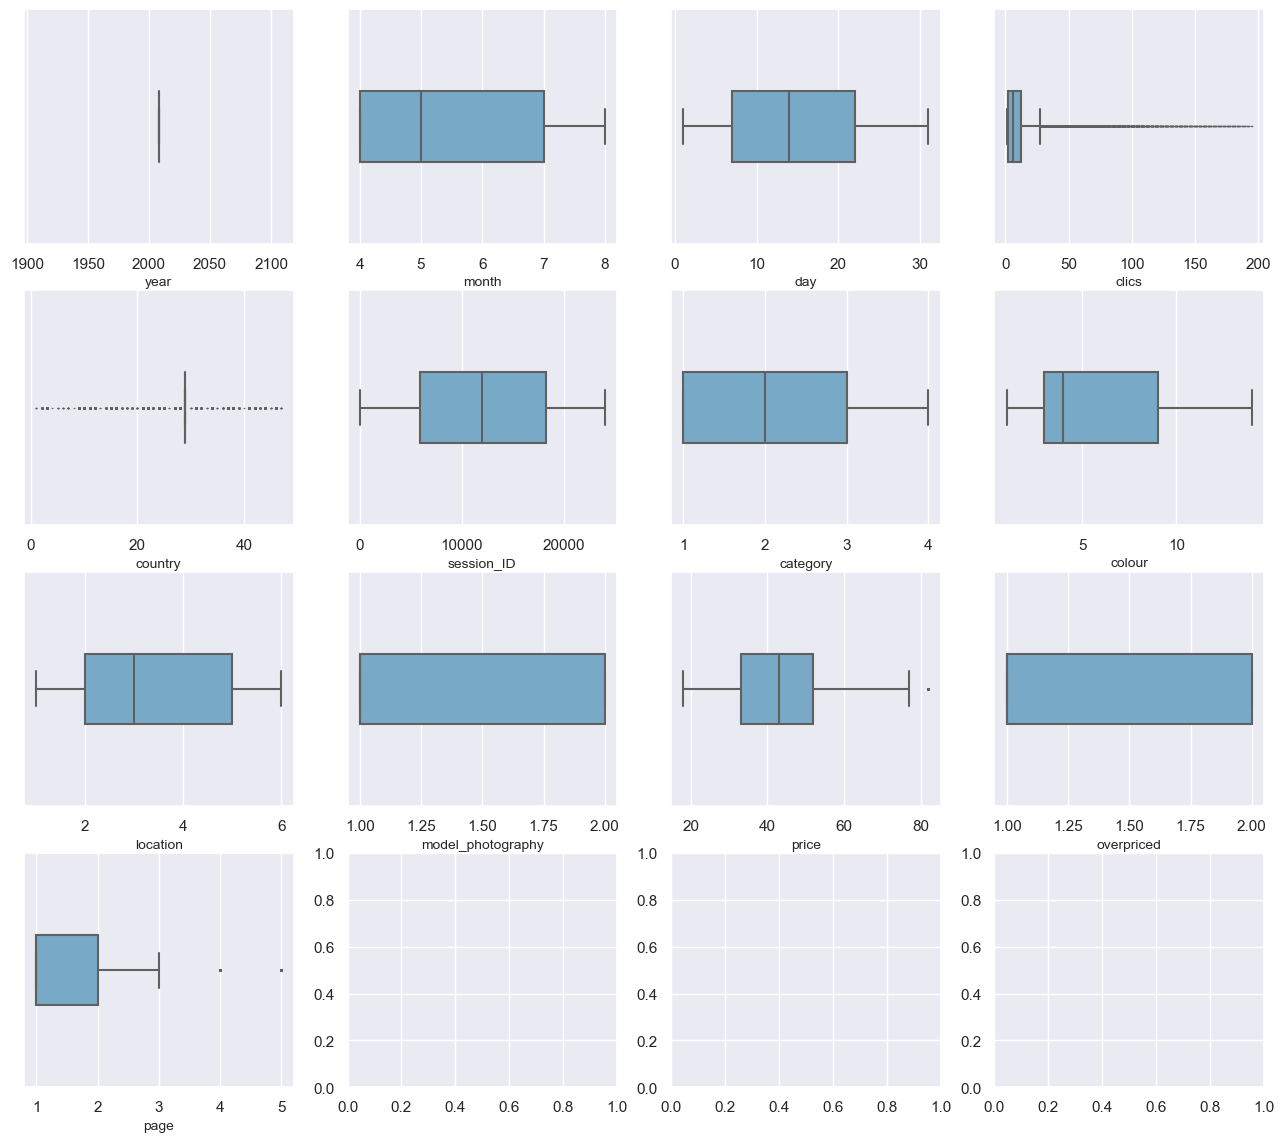

In [13]:
#A continuación verificamos si hay valores atípicos
#Para ello en primer lugar vamos a quedarnos solo con las variables numéricas
dfnum = df.drop(columns = ['clothing_code','date'])

#Lo representaremos para poder ver si hay outliers 
fig,ax= plt.subplots(ncols=4,nrows=4,figsize=(16, 14)) 
for variable, subplot in zip(dfnum.columns,ax.flatten()):
    boxdetails = sns.boxplot(x = dfnum[variable], ax=subplot, palette="Blues", width=0.3, fliersize=0.3) 
    boxdetails.set_xlabel(variable, fontsize = 10)
plt.show()

Con esto podemos ver que solo tiene sentido analizar si hay valores atípicos en algunas de las variables. 
De hecho, en nuestro dataset solo tiene sentido analizar si hay valores atípicos en el precio y en clics
<br>
Lo he considerado así porque en la mayoría de las variables solo hay varias opciones. En el caso de categoria del producto hay cuatro (pantalones, faldas, blusas, ofertas)
<br>
Respecto a las siguientes variables:
- país tendremos que analizarla más detalladamente, pero no son outliers lo que aparece en la gráfica
- página solo tiene cinco opciones, aunque la 4 y la 5 aparezcan como outliers esto solo revela que se han vendido pocos productos en estas páginas 

## 1.3. Análisis de cada variable

### Fecha

In [19]:
df.year.describe()

count    165474.0
mean       2008.0
std           0.0
min        2008.0
25%        2008.0
50%        2008.0
75%        2008.0
max        2008.0
Name: year, dtype: float64

In [20]:
df.month.describe()

count    165474.000000
mean          5.585887
std           1.328160
min           4.000000
25%           4.000000
50%           5.000000
75%           7.000000
max           8.000000
Name: month, dtype: float64

In [21]:
df.day.describe()

count    165474.000000
mean         14.524554
std           8.830374
min           1.000000
25%           7.000000
50%          14.000000
75%          22.000000
max          31.000000
Name: day, dtype: float64

Los datos corresponden a la temporada de abril a agosto de 2008. Debemos tener en cuenta el año, en primer lugar, ya que la economía global se estaba viendo sumergida en una gran crisis. La inflación hacía que los productos se encarecieran. La crisis hizo disminuir la demanda pues las personas necesitaban ahorros y gastaban menos dinero en ropa. 

Vamos a analizar con mayor detalle las compras dentro del mes y día:

<AxesSubplot:xlabel='month', ylabel='Count'>

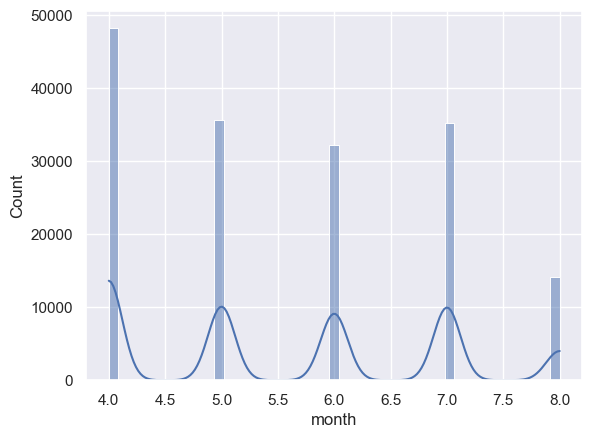

In [25]:
sns.histplot(data=df, x='month', kde=True, palette="Blues", bins=47) 
#El mes de abril fue en el que hubo mayores ventas y agosto en el que menos (con gran diferencia)
#Los meses de mayo, junio y julio se mantuvieron estables, con una pequeña caída en junio.

#Si observáramos los datos históricos de otros años, tomaríamos nota de las épocas del año en las que los productos se compran con más frecuencia 
#y si hubiera un patrón discernible, podríamos tener las temporadas claramente definidas y ser capaz de formular estrategias de venta en torno a estos periodos de tiempo
#Sin embargo, al tener solo cuatro meses en nuestro histórico, solo podemos hacer deducciones según la estacionalidad de ventas del mercado retail

#La ropa es un producto que se adapta a la estacionalidad. No es igual a otros negocios como por ejemplo una tienda de calefactores, que aumentará la demanda de manera desproporcional al comienzo del invierno
#Vamos a analizar las ventas por tipo de producto

In [115]:
#Voy a crear una tabla con cada mes y sus ventas en precio
category = df.groupby('month')['month','category'].value_counts()
category

#Siendo las categorías trousers (1), skirts (2), blouses (3) y sale (4), podemos observar que se venden más pantalones y faldas
#En los meses de mayo y junio se venden menos rebajas

C:\Users\Paula Pareja\AppData\Local\Temp\ipykernel_14480\2981898206.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category = df.groupby('month')['month','category'].value_counts()


month  category
4      1           14314
       4           11584
       3           11287
       2           11014
5      1           10942
       2            8951
       3            8417
       4            7344
6      1            9491
       2            8263
       3            7770
       4            6718
7      1           10871
       4            9120
       3            7858
       2            7382
8      1            4124
       4            3981
       3            3245
       2            2798
dtype: int64

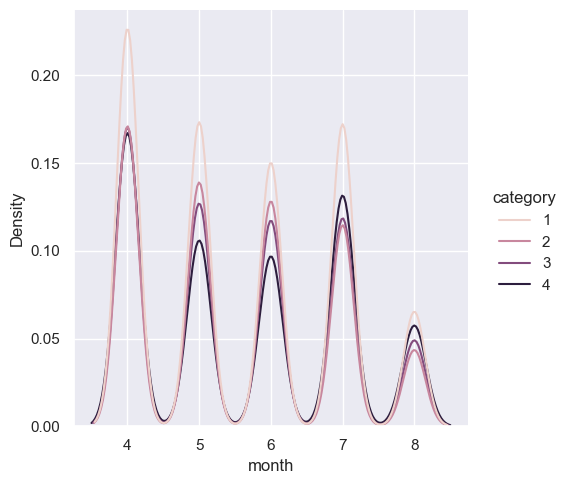

In [125]:
sns.displot(data=df, x="month", hue='category', kind="kde")
#En la gráfica visualizamos muy bien la diferencia en la venta de pantalones frente a las demás categorías
#También se puede observar como suben las ventas de rebajas en julio y agosto

#Posteriomente analizaremos más en detalle las diferentes variables en su temporalidad

### País

In [127]:
df.country.describe()
#Podemos ver que hay 47 países (o IPs)
#el percentil 25, 50 y 75 es 29, esto muestra que se vendieron desproporcionalmente más productos en ese país (Polonia)

count    165474.000000
mean         26.952621
std           7.150691
min           1.000000
25%          29.000000
50%          29.000000
75%          29.000000
max          47.000000
Name: country, dtype: float64

<AxesSubplot:xlabel='country', ylabel='Count'>

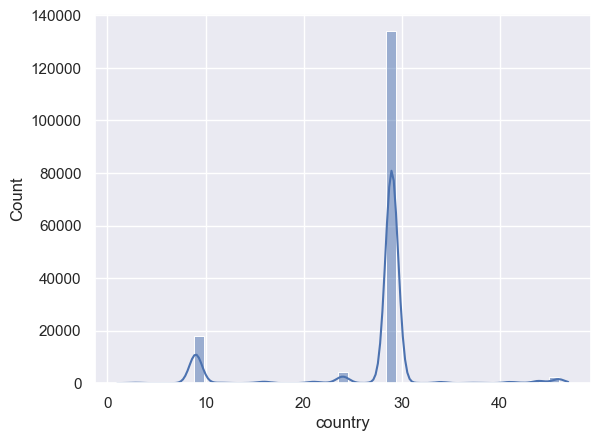

In [128]:
sns.histplot(data=df, x='country', kde=True, palette="Blues", bins=47) 
#no tiene sentido quitar outliers, cuando lo representamos todos son outliers pues todos se repiten muy poco menos tres de ellos

In [129]:
df_country = df.groupby('country')['country'].value_counts()
df_country

country  country
1        1               3
2        2              58
3        3             256
4        4               1
5        5               4
6        6               5
7        7               9
8        8               1
9        9           18003
10       10            152
11       11            115
12       12            210
13       13              2
14       14             43
15       15            125
16       16            834
17       17             23
18       18             18
19       19             29
20       20             10
21       21            811
22       22            144
23       23             46
24       24           4091
25       25             71
26       26              2
27       27            227
28       28            139
29       29         133963
30       30              5
31       31            144
32       32             49
33       33              3
34       34            716
35       35              3
36       36             19
37       37

#### Los países nº 29 (133963), 9 (18003), 24 (4091) son aquellos en los que ha habido más ventas, correspondientes a Polonia, Republica Checa, y Lithuania. Además, las páginas .net y .com aparecen con mayor frecuencia. En estas últimas desconocemos cuál es la dirección IP concreta. 

Si bien podríamos considerar los países que aparecen menos de 10 veces, por ejemplo
 
Esto eliminaría el número 45 y 47, referido a organismos internacionales y organizaciones
Puede ser interesante incluirlo en el análisis por lo que no eliminaremos estos países.
Aún así se me plantea la duda de si 7 ventas son relevantes o puede comprometer el análisis, cuando tenemos un total de 165000 ventas. Por el momento voy a dejarlas y más adelante en el desarrollo de los modelos veré si debo eliminar estos países

Los demás países tienen menos de 1000 ventas, incluso muchos tienen menos de 50. Vamos a ver cuáles son y a crear una tabla con ventas mayores a 1000, entre 1000 y 50 y menores que 50

In [130]:
country1 = pd.DataFrame(data=df_country.index, columns=['country'])
country2 = pd.DataFrame(data=df_country.values, columns=['sale'])
df_country = pd.merge(country1, country2, left_index=True, right_index=True)

In [131]:
df_country

,country,sale
0,"(1, 1)",3
1,"(2, 2)",58
2,"(3, 3)",256
3,"(4, 4)",1
4,"(5, 5)",4
5,"(6, 6)",5
6,"(7, 7)",9
7,"(8, 8)",1
8,"(9, 9)",18003
9,"(10, 10)",152


In [132]:
df_country.columns

Index(['country', 'sale'], dtype='object')

In [133]:
#Para ello, creamos un dataset que atribuya las categorías a los valores según si son 
#"más de 1000 ventas", "entre 50 y 1000 ventas", "menos de 50 ventas"

#Creamos una nueva variable con estas tres categorías
df_country['level_sale'] = pd.cut(df_country.sale,bins=[0,50,1000,10000000],labels=["baja", "media","alta"])

In [134]:
df_country

,country,sale,level_sale
0,"(1, 1)",3,baja
1,"(2, 2)",58,media
2,"(3, 3)",256,media
3,"(4, 4)",1,baja
4,"(5, 5)",4,baja
5,"(6, 6)",5,baja
6,"(7, 7)",9,baja
7,"(8, 8)",1,baja
8,"(9, 9)",18003,alta
9,"(10, 10)",152,media


In [135]:
df_country.groupby('level_sale')['level_sale'].value_counts()

level_sale       
baja        baja     24
            media     0
            alta      0
media       media    18
            baja      0
            alta      0
alta        alta      5
            baja      0
            media     0
Name: level_sale, dtype: int64

<AxesSubplot:xlabel='level_sale', ylabel='Count'>

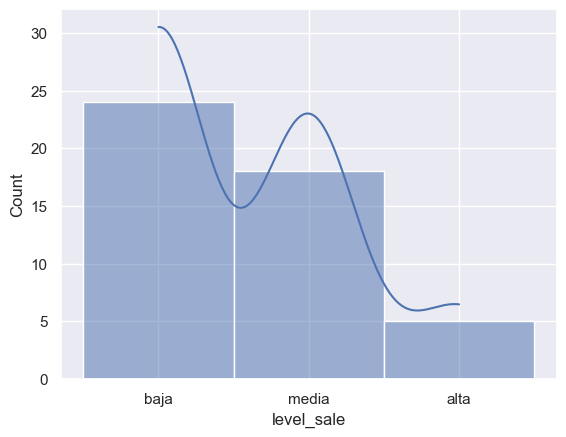

In [136]:
sns.histplot(data=df_country, x='level_sale', kde=True, bins=30)

- Podemos apreciar que tan solo 5 países tienen ventas mayores a 1000 productos en el tiempo analizado
- La mayoría de los países (un total de 24) han vendido menos de 50 productos
- 18 países han vendido entre 50 y 1000 productos

Esto es especialmente relevante a la hora de lanzar campañas publicitarias, por ejemplo, de captación de nuevos clientes. Sin embarbo, debemos tener en cuenta que esta base de datos solo tiene en cuenta desde abril a agosto de 2008. Por ende, deberíamos tener datos históricos para sacar conclusiones precisas. Puede que la compra varíe mucho en un país en diferentes épocas del año, sobre todo considerando que se trata de una tienda de ropa y que puede haber mayores variacones de clima y comportamientos de compra en diferentes países. 
Viendo la gráfica anterior las recomendaciones a priori para el enfoque del marketing serían las siguientes: 
- Centrar las campañas publicitarias en los 5 países con mayores ventas (sobre todo en Polonia)
- Investigar las necesidades y demanda en los países con venta media, por qué no se están vendiendo más (cuestión de tiempo, página web, falta de inversión en campañas...) Quizás el producto, la web o el packaging no están adaptados a la cultura del país. Por ende, si se encuentra un importante hueco de mercado en algún país podríamos plantearnos la adaptación de la web y productos para ese país en concreto. 
- Para aquellas con venta baja (menos de 50 productos), dejar que las compras sigan las demandas de mercado. Para un uso efectivo del presupuesto nos centraremos en países con ventas altas y medias y una vez asentadas haríamos investigaciones de mercado en otros países para encontrar huecos y aumentar las venas. 

In [142]:
#Vamos a analizar los cinco países con mayores ventas (Polonia, Republica Checa, Lithuania, .net y .com)
 #Primero creo una nueva tabla con estos países

top5countries = df[(df["country"] == 9) | (df["country"] == 24) | (df["country"] == 29) | (df["country"] == 44) | (df["country"] == 46)]

In [143]:
top5countries.head(5)

,year,month,day,clics,country,session_ID,category,clothing_code,colour,location,model_photography,price,overpriced,page,date
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1,2008-04-01
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1,2008-04-01
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1,2008-04-01
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1,2008-04-01
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1,2008-04-01


In [140]:
top5countries.groupby('country')['country'].value_counts()

country  country
9        9           18003
24       24           4091
29       29         133963
44       44           1385
46       46           2522
Name: country, dtype: int64

In [152]:
top5countries.groupby(['country','category'])['country'].value_counts()

country  category  country
9        1         9           8262
         2         9           4103
         3         9           5531
         4         9            107
24       1         24          1352
         2         24           885
         3         24           997
         4         24           857
29       1         29         37145
         2         29         31123
         3         29         29611
         4         29         36084
44       1         44           453
         2         44           332
         3         44           349
         4         44           251
46       1         46           869
         2         46           709
         3         46           615
         4         46           329
Name: country, dtype: int64

<AxesSubplot:xlabel='country', ylabel='Count'>

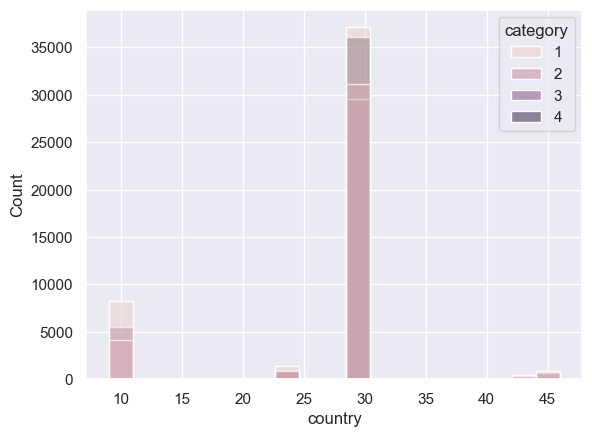

In [159]:
sns.histplot(data=top5countries, x='country',hue='category')
#Existe una gran diferencia en las ventas del país 20, Polonia, donde se venden mayoritariamente pantalones y productos en rebaja
#A continuación, el país 9, República Checa también se venden más pantalones y luego blusas

Teniendo en cuenta esta gran diferencia, posteriormente nos centraremos en las ventas de Polonia y haremos un análisis profundo del país y su comportamiento con las distintas variables

### Usuario ID

In [160]:
df.session_ID.nunique()
#Hay 24026 usuarios diferentes

24026

<AxesSubplot:xlabel='session_ID', ylabel='Count'>

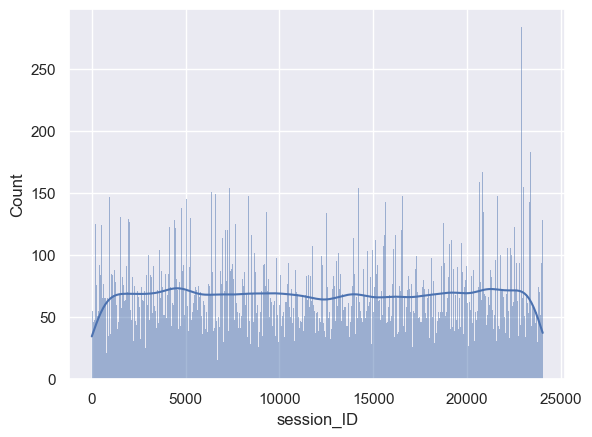

In [167]:
sns.histplot(data=df, x='session_ID', kde=True, palette="Blues", bins=2400)
#Esto resulta muy interesante ya que nos desvela que casi todos los usuarios han comprado más de 25 productos
#Hay uno de los usuarios que ha comprado más de 250 productos
#Hay bastantes usuarios que podríamos considerar como vip pues han comprado más de 100 productos en los 4 meses
#Tendríamos que analizar si son particulares o empresas


In [169]:
ID = df.groupby('session_ID')['session_ID'].value_counts()
ID

session_ID  session_ID
1           1              9
2           2             10
3           3              6
4           4              4
5           5              1
                          ..
24022       24022          3
24023       24023          7
24024       24024          1
24025       24025          1
24026       24026          3
Name: session_ID, Length: 24026, dtype: int64

In [188]:
ID1 = pd.DataFrame(data=ID.index, columns=['session_ID'])
ID2 = pd.DataFrame(data=ID.values, columns=['count'])
IDcount = pd.merge(ID1, ID2, left_index=True, right_index=True)

In [189]:
IDcount

,session_ID,count
0,"(1, 1)",9
1,"(2, 2)",10
2,"(3, 3)",6
3,"(4, 4)",4
4,"(5, 5)",1
...,...,...
24021,"(24022, 24022)",3
24022,"(24023, 24023)",7
24023,"(24024, 24024)",1
24024,"(24025, 24025)",1


In [173]:
IDcount.describe()
#La media de compra por usuario es de unos 6.88 productos
#El percentil 50 es de 4 productos
#El máximo de productos comprados por un usuario es 195
#El mínimo 1 producto

,count
count,24026.000000
mean,6.887289
std,8.995161
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,195.000000


In [176]:
IDnumcompras = IDcount.groupby('count')['count'].value_counts()
IDnumcompras

count  count
1      1        5042
2      2        3320
3      3        2620
4      4        2037
5      5        1597
                ... 
142    142         1
161    161         1
185    185         1
192    192         1
195    195         1
Name: count, Length: 104, dtype: int64

In [180]:
IDnumcompras.head(10)
#Unas 5042 personas han comprado un solo producto 
#3320 han comprado 2 productos
#2620 personas han comprado 3 productos
#2037 personas han comprado 4 productos

count  count
1      1        5042
2      2        3320
3      3        2620
4      4        2037
5      5        1597
6      6        1398
7      7        1117
8      8         934
9      9         749
10     10        648
Name: count, dtype: int64

In [190]:
IDnumcompras.tail(10)
#Asímismo, hay personas que han comprado 195, 192, 185, 161, 142, 128, 121, 120, 112 y 108 productos

count  count
108    108      1
112    112      2
120    120      1
121    121      1
128    128      1
142    142      1
161    161      1
185    185      1
192    192      1
195    195      1
Name: count, dtype: int64

In [191]:
IDcount

,session_ID,count
0,"(1, 1)",9
1,"(2, 2)",10
2,"(3, 3)",6
3,"(4, 4)",4
4,"(5, 5)",1
...,...,...
24021,"(24022, 24022)",3
24022,"(24023, 24023)",7
24023,"(24024, 24024)",1
24024,"(24025, 24025)",1


In [211]:
IDcompras['nivelcompras'] = pd.cut(IDcount['count'],bins=[0,10,25,50,10000],labels=["baja", "media","media-alta","alta"])

In [216]:
IDcompras['nivelcompras']

0        baja
1        baja
2        baja
3        baja
4        baja
         ... 
24021    baja
24022    baja
24023    baja
24024    baja
24025    baja
Name: count, Length: 24026, dtype: category
Categories (4, object): ['baja' < 'media' < 'media-alta' < 'alta']

In [217]:
IDcompras.groupby('nivelcompras').value_counts()

count       count
baja        baja     19462
media       baja      3649
media-alta  baja       779
alta        media      119
            alta        17
Name: count, dtype: int64

<AxesSubplot:xlabel='nivelcompras', ylabel='Count'>

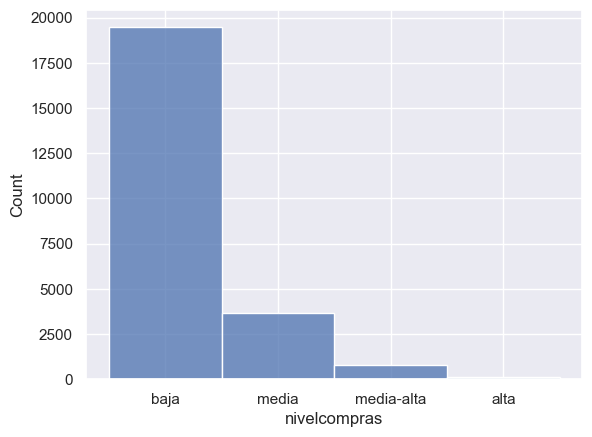

In [215]:
sns.histplot(data=IDcompras, x='nivelcompras', bins=30)

<AxesSubplot:xlabel='count', ylabel='Count'>

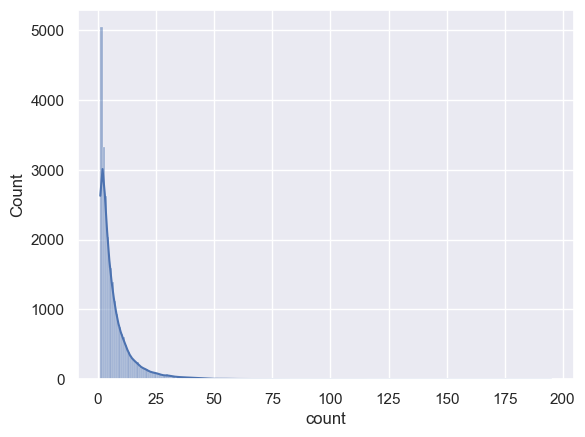

In [218]:
sns.histplot(data=IDcount, x='count', kde=True, palette="Blues", bins=200)
#Como podemos ver la mayoría de las personas compra de 0 a 25 productos y muy pocas personas compran grandes cantidades

#### Conclusiones sobre los clientes
- La mayoría de los clientes compran menos de 10 productos (19462 clientes)
    - De hecho, unas 13019 personas compraron menos de 5 productos
- 3649 clientes han comprado entre 10 y 25 productos
- 779 clientes han comprado entre 25 y 50 productos
- 119 clientes han comprado más de 50 productos



Vamos a analizar los que fueron recurrentes 

In [291]:
import datetime as dt

In [349]:
df.drop(columns=['CohortMonth','CohortIndex'], inplace=True)

In [350]:
df.head()

,year,month,day,clics,country,session_ID,category,clothing_code,colour,location,model_photography,price,overpriced,page,date
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1,2008-04-01
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1,2008-04-01
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1,2008-04-01
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1,2008-04-01
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1,2008-04-01


In [351]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
df['InvoiceMonth'] = df['date'].apply(get_month)
df.head()
#El invoice month representa el mes en el que se realizó la compra

,year,month,day,clics,country,session_ID,category,clothing_code,colour,location,model_photography,price,overpriced,page,date,InvoiceMonth
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1,2008-04-01,2008-04-01
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1,2008-04-01,2008-04-01
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1,2008-04-01,2008-04-01
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1,2008-04-01,2008-04-01
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1,2008-04-01,2008-04-01


In [354]:
grouping = df.groupby('session_ID')['InvoiceMonth']
grouping.head()
#Ahora los agrupamos por sesión y mostramos la fecha de compra 
#Hay 82,725 valores y 24,026 usuarios por lo que varios han comprado en diferentes meses
#Voy a intentar sacar una función que me diga cuantas veces se repite cada valor

0        2008-04-01
1        2008-04-01
2        2008-04-01
3        2008-04-01
4        2008-04-01
            ...    
165469   2008-08-01
165470   2008-08-01
165471   2008-08-01
165472   2008-08-01
165473   2008-08-01
Name: InvoiceMonth, Length: 82725, dtype: datetime64[ns]

In [367]:
df['CohortMonth'] = grouping.transform('min')
#Creo una columna con la fecha mínima en la que el usuario compró

In [368]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    date = df[column].dt.date
    return year, month, date
Invoice_Year, Invoice_Month, _ = get_date_int(df, 'date')
Cohort_Year, Cohort_Month , _ = get_date_int(df, 'CohortMonth')
Year_Diff = Invoice_Year - Cohort_Year
Month_Diff = Invoice_Month - Cohort_Month
df['CohortIndex'] = Month_Diff +1
df.head()

,year,month,day,clics,country,session_ID,category,clothing_code,colour,location,model_photography,price,overpriced,page,date,InvoiceMonth,CohortMonth,CohortIndex
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1,2008-04-01,2008-04-01,2008-04-01,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1,2008-04-01,2008-04-01,2008-04-01,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1,2008-04-01,2008-04-01,2008-04-01,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1,2008-04-01,2008-04-01,2008-04-01,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1,2008-04-01,2008-04-01,2008-04-01,1


In [369]:
df.CohortIndex.describe()
#Con la función anterior debería poder sacar la diferencia de meses pero sin embargo no funciona
#De todas formas, esto no nos diría las veces en las que un usuario repite ni en qué meses
#Para ello voy a agrupar directamente por usuario y por mes de compra

count    165474.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: CohortIndex, dtype: float64

In [469]:
usuarios = df.groupby('session_ID')['session_ID','month']

C:\Users\Paula Pareja\AppData\Local\Temp\ipykernel_14480\828800276.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  usuarios = df.groupby('session_ID')['session_ID','month']


In [472]:
usuarios.value_counts()

session_ID  month
1           4         9
2           4        10
3           4         6
4           4         4
5           4         1
                     ..
24022       8         3
24023       8         7
24024       8         1
24025       8         1
24026       8         3
Length: 24026, dtype: int64

In [ ]:
#Ahora que tengo el usuario, el mes y el número de veces que aparece ese mes, tengo que analizar cuales de ellos han repetido
#NO CONSIGO ANALIZAR LA FRECUENCIA DE COMPRA DEL USUARIO

In [454]:
dfcomprasmes = df[['session_ID','date','month']]

In [441]:
dfcomprasmes

,session_ID,date,month
0,1,2008-04-01,4
1,1,2008-04-01,4
2,1,2008-04-01,4
3,1,2008-04-01,4
4,1,2008-04-01,4
...,...,...,...
165469,24024,2008-08-13,8
165470,24025,2008-08-13,8
165471,24026,2008-08-13,8
165472,24026,2008-08-13,8


In [445]:
dfcomprasmensuales = dfcomprasmes.groupby('session_ID')

In [447]:
dfcomprasmensuales.head()

,session_ID,date,month
0,1,2008-04-01,4
1,1,2008-04-01,4
2,1,2008-04-01,4
3,1,2008-04-01,4
4,1,2008-04-01,4
...,...,...,...
165469,24024,2008-08-13,8
165470,24025,2008-08-13,8
165471,24026,2008-08-13,8
165472,24026,2008-08-13,8


In [424]:
usuarios.head()
#tengo una tabla en la que aparece la sesión ID y el mes 

,session_ID,month
0,1,4
1,1,4
2,1,4
3,1,4
4,1,4
...,...,...
165469,24024,8
165470,24025,8
165471,24026,8
165472,24026,8


In [ ]:
#Sin embargo lo que yo quiero ver ahora es si esos usuarios han comprado también el mes anterior
#Para ello tengo que crear una función PERO NO LO CONSIGO asdfasdfasdf

### Categoría

Sabemos que hay cuatro categorías, que son pantalones, faldas, blusas y productos en rebajas
- (1) trousers
- (2) skirts
- (3) blouses
- (4) sale

<AxesSubplot:xlabel='month', ylabel='Count'>

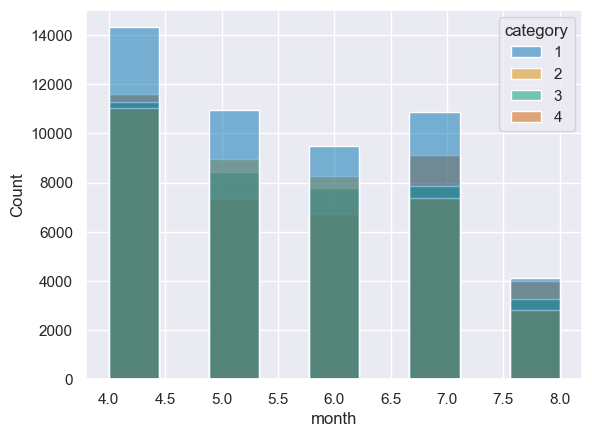

In [482]:
sns.histplot(data=df, x='month', hue='category', palette='colorblind', bins=9)

#POR QUÉ NO SE CORRESONDE AL COLOR

<AxesSubplot:xlabel='month', ylabel='Count'>

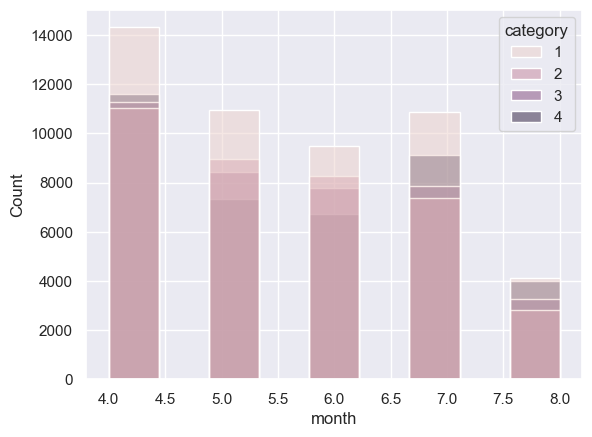

In [481]:
sns.histplot(data=df, x='month', hue='category', bins=9)
#Podemos ver que el producto que más se vende son las pantalones. Después las blusas. 
#En los meses de abril, julio y agosto se venden más productos en oferta

#El color apenas se diferencia, tengo que cambiarlo pero no se representa facilmente

<AxesSubplot:xlabel='category', ylabel='price'>

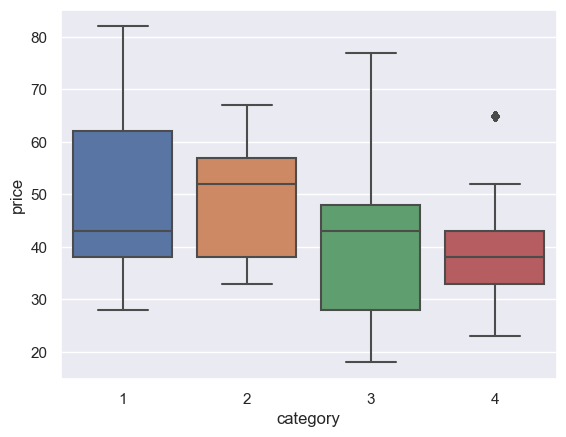

In [487]:
sns.boxplot( x=df["category"], y=df["price"] )
#Como podemos ver, los pantalones tienen precios más altos, al igual que las blusas (estos son los más comprados)
#Aunque el precio maximo de algunas blusas es más alto, el precio de la mayoría de vendidos no supera al precio medio vendido de faldas
#De hecho, respecto a la mayoría de productos vendidos de una categoría, se suelen vender las faldas y blusas más caras dentro de la categoria
#Por el contrario, se suelen venden los pantalones más baratos dentro de su categoría (aunque se vendan todos)
#Como es de esperar, las rebajas (4) tienen precios más bajos. Algunos productos vendidos estaban fuera del precio normal de rebajas

### Producto

In [488]:
df.columns

Index(['year', 'month', 'day', 'clics', 'country', 'session_ID', 'category',
       'clothing_code', 'colour', 'location', 'model_photography', 'price',
       'overpriced', 'page', 'date', 'InvoiceMonth', 'CohortMonth',
       'CohortIndex'],
      dtype='object')

In [489]:
df.clothing_code.describe()
#Hay un total de 217 productos

count     165474
unique       217
top           B4
freq        3579
Name: clothing_code, dtype: object

In [509]:
productos = df.groupby('clothing_code')['clothing_code'].value_counts()

In [510]:
productos

clothing_code  clothing_code
A1             A1               2265
A10            A10              2280
A11            A11              2789
A12            A12              2010
A13            A13              1577
                                ... 
P8             P8                661
P80            P80               222
P81            P81               202
P82            P82               725
P9             P9                612
Name: clothing_code, Length: 217, dtype: int64

In [511]:
type(productos)

pandas.core.series.Series

In [512]:
dfproducts = productos.to_frame()

In [520]:
dfproducts = dfproducts.rename(columns={'clothing_code': 'count'})
dfproducts.columns

Index(['count'], dtype='object')

In [521]:
dfproducts

,,count
clothing_code,clothing_code,
A1,A1,2265
A10,A10,2280
A11,A11,2789
A12,A12,2010
A13,A13,1577
...,...,...
P8,P8,661
P80,P80,222
P81,P81,202


In [538]:
dfproducts['count'].describe()
#La media de ventas por producto es de 762, el percentil 50 es 590 
#El mínimo es 1 y el máximo es 3579 ventas por un producto

count     217.000000
mean      762.552995
std       614.330174
min         1.000000
25%       356.000000
50%       590.000000
75%       949.000000
max      3579.000000
Name: count, dtype: float64

In [543]:
dfproducts[(dfproducts['count']==3579)]
#El producto más vendido corresponde al código B4

,,count
clothing_code,clothing_code,
B4,B4,3579


In [546]:
df[(df['code']=='B4')]
#Se trata de una falda, en la página 1 del e-commerce y de color verde oliva

,year,month,day,clics,country,session_ID,category,code,colour,location,model_photography,price,overpriced,page,date,InvoiceMonth,CohortMonth,CohortIndex
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1,2008-04-01,2008-04-01,2008-04-01,1
45,2008,4,1,11,29,7,2,B4,10,2,1,52,1,1,2008-04-01,2008-04-01,2008-04-01,1
60,2008,4,1,3,16,10,2,B4,10,2,1,52,1,1,2008-04-01,2008-04-01,2008-04-01,1
64,2008,4,1,1,29,12,2,B4,10,2,1,52,1,1,2008-04-01,2008-04-01,2008-04-01,1
144,2008,4,1,3,29,24,2,B4,10,2,1,52,1,1,2008-04-01,2008-04-01,2008-04-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165317,2008,8,13,4,29,24011,2,B4,10,2,1,52,1,1,2008-08-13,2008-08-01,2008-08-01,1
165362,2008,8,13,38,29,24012,2,B4,10,2,1,52,1,1,2008-08-13,2008-08-01,2008-08-01,1
165363,2008,8,13,39,29,24012,2,B4,10,2,1,52,1,1,2008-08-13,2008-08-01,2008-08-01,1
165416,2008,8,13,12,29,24018,2,B4,10,2,1,52,1,1,2008-08-13,2008-08-01,2008-08-01,1


In [554]:
dfproducts['nivel_venta'] = pd.cut(dfproducts['count'],bins=[0,100,500,1000,1000000],labels=["Menos de 100", "100-500","500-1000","Más de 1000"])

In [555]:
dfproducts

,,count,nivelventa,nivel_venta
clothing_code,clothing_code,,,
A1,A1,2265,alta,Más de 1000
A10,A10,2280,alta,Más de 1000
A11,A11,2789,alta,Más de 1000
A12,A12,2010,alta,Más de 1000
A13,A13,1577,alta,Más de 1000
...,...,...,...,...
P8,P8,661,media-alta,500-1000
P80,P80,222,media,100-500
P81,P81,202,media,100-500


<AxesSubplot:xlabel='nivel_venta', ylabel='Count'>

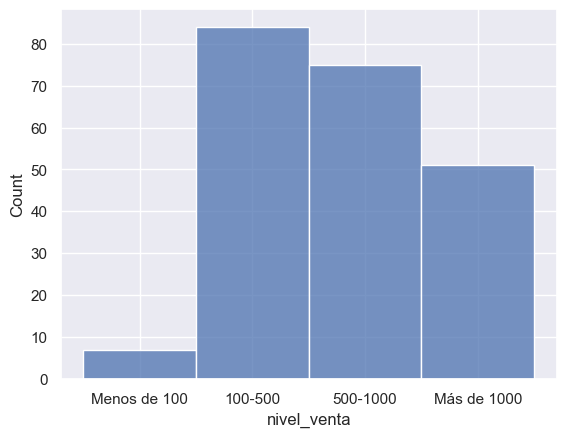

In [558]:
sns.histplot(data=dfproducts, x='nivel_venta', bins=30)
#Como podemos ver menos de 10 productos se vendieron menos de 100 unidades
#Más de 80 productos vendieron entre 100 y 500 unidades 
#Alrededor de 50 productos vendieron más de 1000 unidades

### Precio

In [561]:
df.price.describe()
#El precio máximo de un producto es 82 dólares
#El percentil 50 es 43, muy parecido a la media
#El precio más bajo es de 18 euros 

count    165474.000000
mean         43.802507
std          12.548131
min          18.000000
25%          33.000000
50%          43.000000
75%          52.000000
max          82.000000
Name: price, dtype: float64

In [563]:
df.overpriced.describe()

count    165474.000000
mean          1.488167
std           0.499861
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: overpriced, dtype: float64

In [565]:
import numpy as np
np.sum(df['overpriced'] == 1)

84695

In [567]:
df.shape

(165474, 18)

In [568]:
165474-84695

80779

Hay 84695 productos vendidos que estaban por encima de su precio habitual y 80779 que no lo estaban.

Esto quiere decir que la mitad de los productos que vende la tienda están por encima del precio habitual en comparación con su categoría

### Fotografía

LOCATION: photo location on the page, the screen has been divided into six parts:

- 1-top left
- 2-top in the middle
- 3-top right
- 4-bottom left
- 5-bottom in the middle
- 6-bottom right

In [571]:
df.columns

Index(['year', 'month', 'day', 'clics', 'country', 'session_ID', 'category',
       'code', 'colour', 'location', 'model_photography', 'price',
       'overpriced', 'page', 'date', 'InvoiceMonth', 'CohortMonth',
       'CohortIndex'],
      dtype='object')

In [573]:
df.groupby('model_photography')['model_photography'].value_counts()
#Hay el triple de productos vendidos con fotografías de frente (1) que de perfil (2)
#Vamos a ver como se relaciona con otras variables

model_photography  model_photography
1                  1                    122439
2                  2                     43035
Name: model_photography, dtype: int64

In [575]:
#Por ejemplo, vamos a ver si varía el tipo de fotografía según su localización en la página
df.groupby('model_photography')['location'].value_counts()

model_photography  location
1                  1           27570
                   2           24575
                   4           20569
                   5           16801
                   3           16677
                   6           16247
2                  5           10982
                   2            8808
                   1            6962
                   4            6808
                   3            4979
                   6            4496
Name: location, dtype: int64

<AxesSubplot:xlabel='location', ylabel='Count'>

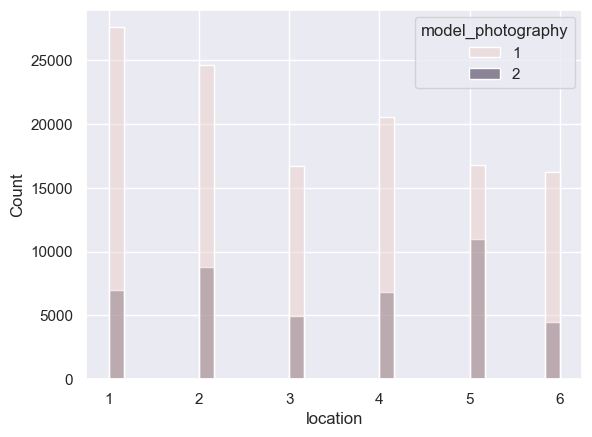

In [579]:
sns.histplot(data=df, x='location', hue='model_photography',bins=30)

Podemos observar que la proporción de imágenes de frente es dispar y el porcentaje de unas y otras varía según la localización en la página.
<br>
Según la gráfica, donde hay más imágenes de perfil es la parte inferior central de la página
<br>
Donde hay menos es en la parte parte inferior y superior derecha

<AxesSubplot:xlabel='page', ylabel='Count'>

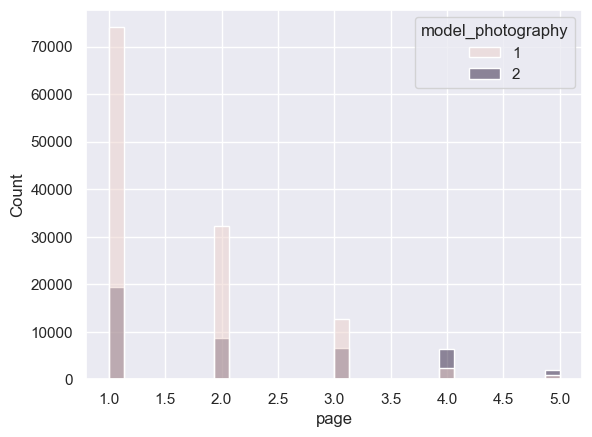

In [580]:
sns.histplot(data=df, x='page', hue='model_photography',bins=30)

Hay muchos más productos en la página 1, donde también aparecen muchas más imágenes de frente.
<br>
En la página 4 y 5, donde hay menores ventas, se usan más imágenes de perfil. Esto puede indicarnos que dichas páginas no están enfocadas a venta o son más de exposición. Quizás habría que cambiar las imágenes de estas páginas. 
<br>
Como mencioné con anterioridad, el hecho de no conocer la estructura de la página web (cómo se organizan las diferentes páginas) resulta imposible realizar un análisis de ventas según las páginas y dar consejos de mejora de la web y experiencia de usuario.

### Clics

In [583]:
df.clics.describe()

count    165474.000000
mean          9.817476
std          13.478411
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max         195.000000
Name: clics, dtype: float64

El máximo de clics por sesión es de 195
<br>
La media es de 9.8 clics por sesión, lo cual me resulta muy bajo (parece que las personas entran a la página y ya tienen localizado el producto)
<br>
El mínimo es 1, lo cual me parece imposible pues debes dar clic al producto y a comprar como mínimo (ya son dos clics)

### Color

In [586]:
df.colour.describe()

count    165474.000000
mean          6.227655
std           4.235606
min           1.000000
25%           3.000000
50%           4.000000
75%           9.000000
max          14.000000
Name: colour, dtype: float64

COLOUR: colour of product
- 1. beige
- 2. black
- 3. blue
- 4. brown
- 5. burgundy
- 6. gray
- 7. green
- 8. navy blue
- 9. of many colors
- 10. olive
- 11. pink
- 12. red
- 13. violet
- 14. white

In [598]:
ncolours = df.groupby('colour')['colour'].value_counts()

In [599]:
ncolours

colour  colour
1       1          7785
2       2         29764
3       3         29259
4       4         16517
5       5          1667
6       6         17476
7       7          6876
8       8          2664
9       9         13531
10      10         3579
11      11         5292
12      12         8830
13      13         6295
14      14        15939
Name: colour, dtype: int64

In [601]:
ncolours.to_frame()

,,colour
colour,colour,
1,1,7785
2,2,29764
3,3,29259
4,4,16517
5,5,1667
6,6,17476
7,7,6876
8,8,2664
9,9,13531
